In [1]:
# Import the libraries you'll need
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
# Load your dataset (here we're using Titanic data from Seaborn)
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Preprocess the dataset: Drop nulls and handle categorical variables
titanic = titanic.dropna()
titanic['sex'] = titanic['sex'].apply(lambda x: 1 if x == 'male' else 0)
titanic['embarked'] = titanic['embarked'].apply(lambda x: ord(x) - ord('C'))

# Define features and target
X = titanic[['pclass', 'age', 'sex', 'fare']]
y = titanic['survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [3]:
# Create the SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

In [4]:
# Generate a SHAP summary plot
shap.summary_plot(shap_values[1], X_test)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [5]:
explainer = shap.Explainer(rf_model, X_train)  # or just shap.Explainer(rf_model)
shap_values = explainer(X_test)   # returns an Explanation object


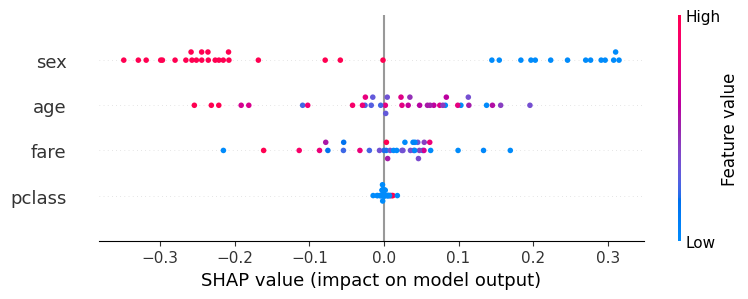

In [7]:
explainer = shap.TreeExplainer(rf_model)
shap_vals = explainer.shap_values(X_test)  # maybe a list or 3D array

# If shap_vals is a list of 2 arrays:
# shap_vals[0].shape == (n_samples, n_features)
# shap_vals[1].shape == (n_samples, n_features)
# We often choose the “positive” class:
sv = shap_vals[1]

# If shap_vals is a 3D numpy array:
# shape == (n_samples, n_features, n_classes)
# then pick:
sv = shap_vals[:, :, 1]

# Then:
shap.summary_plot(sv, X_test)

